In [51]:
import numpy as np 
import pandas as pd

hci_data = pd.read_csv('data/HCI.csv')

for col in hci_data.columns[1:]:
    hci_data[col] = pd.to_numeric(hci_data[col], errors='coerce')
    hci_data[col] = hci_data[col].fillna(hci_data[col].median())

In [52]:
# Load data
import matplotlib.pyplot as plt
rdf = pd.read_csv('data/refugee_monthly.csv')
rdf.columns = ['Country', 'Origin', 'Year', 'Month', 'Value']

# Clean up data
col = 'Value'
rdf[col] = pd.to_numeric(rdf[col], errors='coerce')
rdf[col] = rdf[col].fillna(2)

month_mapping = {'January':1, 'February':2, 'April':3, 'May':4, 'July':5, 'August':6,'September':7, 'October':8, 'November':9, 'June':10, 'March':11, 'December': 12}
rdf.Month = rdf.Month.map(month_mapping)

# Create initial frame
init_frame = rdf.groupby(["Year", "Month", "Country"]).size().reset_index().drop([0], axis=1)
init_frame = init_frame[init_frame['Country'] == 'Turkey'].reset_index(drop=True)

/home/shivam/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
heavy_hitters = ['Iraq', 'Afghanistan', 'Iran (Islamic Rep. of)', 'Somalia', 'Syrian Arab Rep.', 'Pakistan', 'Palestinian', 'Uzbekistan', 'Sudan', 'Uganda']

def find_ref_hotspots(ref_data, country, high_hitters=10):
    country_data = ref_data[ref_data.Country==country]
    ref_counts = country_data.groupby(['Origin'], as_index=False)['Value'].sum()
    sort_ref = ref_counts.sort_values('Value', ascending=False)
    return sort_ref["Origin"][:high_hitters].tolist()
    
# Retrieve heavy hitters of country
print(find_ref_hotspots(rdf, "Turkey"))

['Iraq', 'Afghanistan', 'Iran (Islamic Rep. of)', 'Somalia', 'Syrian Arab Rep.', 'Pakistan', 'Palestinian', 'Uzbekistan', 'Sudan', 'Uganda']


In [54]:
def add_historical_data(init_frame, ref_data, look_back=5):
    # TODO: Waiting on Arthur data
    return init_frame

In [55]:
# Add heavy hitters current data
def add_hhcurr_data(iframe, rdata):
    for i, hh in enumerate(heavy_hitters):
        cfilter = rdata[rdata.Origin == hh]
        cfilter_next = cfilter[['Year','Month','Value']].groupby(['Year','Month'], as_index=False).sum()
        iframe['{}_curr'.format(hh)] = cfilter_next['Value']
    return iframe

add_hhcurr_data(init_frame, rdf)

,Year,Month,Country,Iraq_curr,Afghanistan_curr,Iran (Islamic Rep. of)_curr,Somalia_curr,Syrian Arab Rep._curr,Pakistan_curr,Palestinian_curr,Uzbekistan_curr,Sudan_curr,Uganda_curr
0,1999,1,Turkey,3277.0,1583.0,1040.0,1509.0,418.0,667.0,32.0,18.0,322.0,39.0
1,1999,2,Turkey,2431.0,1262.0,888.0,1147.0,361.0,651.0,49.0,12.0,254.0,30.0
2,1999,3,Turkey,2749.0,1610.0,1039.0,1293.0,276.0,722.0,39.0,29.0,255.0,39.0
3,1999,4,Turkey,2542.0,1577.0,1041.0,1182.0,262.0,756.0,37.0,12.0,219.0,36.0
4,1999,5,Turkey,2954.0,1883.0,1312.0,1246.0,304.0,979.0,41.0,43.0,270.0,54.0
5,1999,6,Turkey,2780.0,2198.0,1830.0,1443.0,347.0,1045.0,29.0,50.0,264.0,59.0
6,1999,7,Turkey,3282.0,2436.0,1985.0,1407.0,469.0,1073.0,27.0,58.0,243.0,90.0
7,1999,8,Turkey,3175.0,2641.0,1991.0,1179.0,412.0,931.0,37.0,67.0,324.0,70.0
8,1999,9,Turkey,3272.0,3369.0,1844.0,968.0,460.0,1148.0,38.0,96.0,375.0,75.0
9,1999,10,Turkey,2598.0,1921.0,1280.0,1266.0,316.0,839.0,52.0,23.0,231.0,64.0


In [ ]:

# Add heavy hitters current data
def add_hhcurr_data(iframe, rdata):
    for i, hh in enumerate(heavy_hitters):
        cfilter = rdata[rdata.Origin == hh]
        cfilter_next = cfilter[['Year','Month','Value']].groupby(['Year','Month'], as_index=False).sum()
        iframe['{}_curr'.format(hh)] = cfilter_next['Value']
    return iframe

add_hhcurr_data(init_frame, rdf)

/home/shivam/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


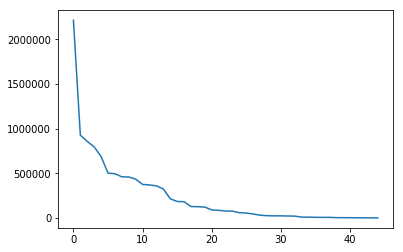

In [169]:
# Finding global heavy hitters

import matplotlib.pyplot as plt
rdf = pd.read_csv('data/refugee_monthly.csv')
rdf.columns = ['Country', 'Origin', 'Year', 'Month', 'Value']

col = 'Value'
rdf[col] = pd.to_numeric(rdf[col], errors='coerce')
rdf[col] = rdf[col].fillna(rdf[col].median())


ref_counts = rdf.groupby(['Country'], as_index=False)['Value'].sum()
sort_ref = ref_counts.sort_values('Value', ascending=False)

plt.plot(sort_ref['Value'].as_matrix())

In [94]:
isomapping = dict(pd.read_csv('data/iso-country.csv').values)
inform_data = pd.read_csv('data/core-indeces.csv')

inform_data.ISO = inform_data.ISO.map(isomapping)
inform_data[['IndicatorName', 'ISO']]

inform_data=inform_data.set_index(['INFORMYear', "ISO"])

# df = inform_data.pivot(columns='IndicatorName', values='IndicatorScore')
# inform_data
inform_data = pd.pivot_table(inform_data, values = 'IndicatorScore', index=['INFORMYear','ISO'], columns = 'IndicatorName').reset_index()

for col in inform_data.columns[2:]:
    inform_data[col] = pd.to_numeric(inform_data[col], errors='coerce')
    inform_data[col] = inform_data[col].fillna(inform_data[col].median())
    # Normalize data
    inform_data[col] = (inform_data[col]-inform_data[col].mean())/inform_data[col].std()

inform_data.to_csv("data/inform_index.csv")
